# Chapter 2.2
# Euler Method
Program computes the time evolution of a simple pendulum using the Euler method.

Turning point at time t = 1.6
Turning point at time t = 4.8
Turning point at time t = 8.0
Turning point at time t = 11.1
Turning point at time t = 14.3
Turning point at time t = 17.5
Turning point at time t = 20.7
Turning point at time t = 23.9
Turning point at time t = 27.1
Average period = 6.375 +/- 0.02339


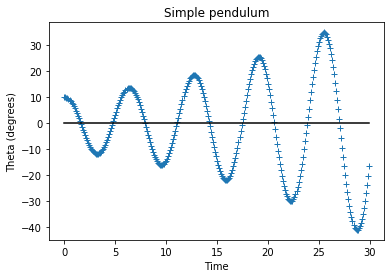

In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt

#theta = input("Enter angle in degrees theta = ")  #in degrees
theta = 10
theta = theta*math.pi/180                       #convert degrees to radians
omega = 0                                       #initial velocity
#tau = input("Enter timestep, tau")              #in seconds [s]
tau = 0.1
g_over_L = 1                                    #The constant g/L []
time_old = -1                                   #Fake value (see below)
irev = 0                                        #Used to count number of reversals
nstep = 300                                     #number of time steps
time = 0

#Main Loop
t_plot = np.zeros(nstep)
theta_plot = np.zeros(nstep)
period = np.zeros(nstep)
for n in np.array(range(nstep)):
    t_plot[n] = time                            #Record time and angle
    theta_plot[n] = theta*180/math.pi           #theta for plotting
    a = -g_over_L*math.sin(theta)               #Gravitational acceleration
    theta_old = theta  
    theta = theta +tau*omega                    #Euler Method
    omega = omega +tau*a
    time = time + tau
    if theta*theta_old < 0:                    #Test position for sign change
        print('Turning point at time t =', round(time,5))
        if time_old < 0:                       #If this is just the first change
            time_old = time                    #just record the time
        else:
            irev = irev + 1                    #Increment the number of reversals
            period[irev] = 2*(time - time_old)
            time_old = time
print('Average period =', round(np.mean(period[range(1,irev+1)]),5),'+/-', round(np.std(period[range(1,irev+1)])/math.sqrt(irev),5))
#Graph the oscillations
plt.plot(t_plot,theta_plot, '+')
plt.title('Simple pendulum')
plt.xlabel('Time')
plt.ylabel('Theta (degrees)')
plt.plot([0, t_plot[n]], [0, 0], 'k-')

Turning point at time t = 1.6
Turning point at time t = 4.75
Turning point at time t = 7.9
Turning point at time t = 11.05
Turning point at time t = 14.2
Turning point at time t = 17.35
Turning point at time t = 20.55
Turning point at time t = 23.7
Turning point at time t = 26.85
Average period = 6.3125 +/- 0.01169


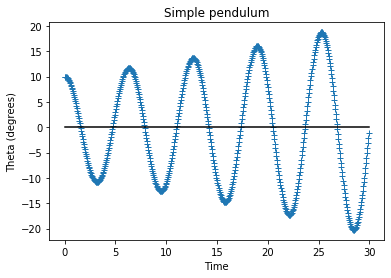

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt

#theta = input("Enter angle in degrees theta = ")  #in degrees
theta = 10
theta = theta*math.pi/180                       #convert degrees to radians
omega = 0                                       #initial velocity
#tau = input("Enter timestep, tau")              #in seconds [s]
tau = 0.05
g_over_L = 1                                    #The constant g/L []
time_old = -1                                   #Fake value (see below)
irev = 0                                        #Used to count number of reversals
nstep = 600                                     #number of time steps
time = 0

#Main Loop
t_plot = np.zeros(nstep)
theta_plot = np.zeros(nstep)
period = np.zeros(nstep)
for n in np.array(range(nstep)):
    t_plot[n] = time                            #Record time and angle
    theta_plot[n] = theta*180/math.pi           #theta for plotting
    a = -g_over_L*math.sin(theta)               #Gravitational acceleration
    theta_old = theta  
    theta = theta +tau*omega                    #Euler Method
    omega = omega +tau*a
    time = time + tau
    if theta*theta_old < 0:                    #Test position for sign change
        print('Turning point at time t =', round(time,5))
        if time_old < 0:                       #If this is just the first change
            time_old = time                    #just record the time
        else:
            irev = irev + 1                    #Increment the number of reversals
            period[irev] = 2*(time - time_old)
            time_old = time
print('Average period =', round(np.mean(period[range(1,irev+1)]),5),'+/-', round(np.std(period[range(1,irev+1)])/math.sqrt(irev),5))
#Graph the oscillations
plt.plot(t_plot,theta_plot, '+')
plt.title('Simple pendulum')
plt.xlabel('Time')
plt.ylabel('Theta (degrees)')
plt.plot([0, t_plot[n]], [0, 0], 'k-')

# Verlet method
Program computes the time evolution of a simple pendulum using the Verlet scheme.

Turning point at time t = 1.6
Turning point at time t = 4.7
Turning point at time t = 7.9
Turning point at time t = 11.0
Turning point at time t = 14.2
Turning point at time t = 17.3
Turning point at time t = 20.5
Turning point at time t = 23.6
Turning point at time t = 26.7
Turning point at time t = 29.9
Average period = 0.18867 +/- 0.35765


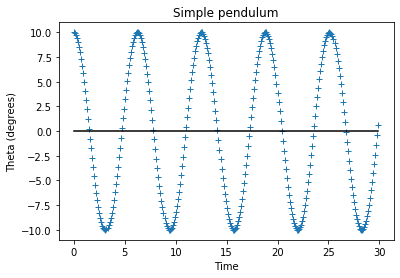

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt

#theta = input("Enter angle in degrees theta = ")  #in degrees
theta = 10
theta = theta*math.pi/180                       #convert degrees to radians
omega = 0                                       #initial velocity
#tau = input("Enter timestep, tau")              #in seconds [s]
tau = 0.1
g_over_L = 1                                    #The constant g/L []
time_old = -1                                   #Fake value (see below)
irev = 0                                        #Used to count number of reversals
nstep = 300                                     #number of time steps
time = 0

#Main Loop
t_plot = np.zeros(nstep)
theta_plot = np.zeros(nstep)
period = np.zeros(nstep)
theta_old = theta - omega*tau                   #Take one backward Euler step in order to start
for n in np.array(range(nstep)):
    t_plot[n] = time                            #Record time and angle
    theta_plot[n] = theta*180/math.pi           #theta for plotting
    a = -g_over_L*math.sin(theta)               #Gravitational acceleration
    theta_new = 2*theta - theta_old +tau**2*a   #Verlet method
    theta_old = theta
    theta = theta_new
    time = time + tau
    if theta*theta_old < 0:                    #Test position for sign change
        print('Turning point at time t =', round(time,5))
        if time_old < 0:                       #If this is just the first change
            time_old = time                    #just record the time
        else:
            irev = irev + 1                    #Increment the number of reversals
            period[irev] = 2*(time - time_old)
            time_old = time
print('Average period =', round(np.mean(period),5),'+/-', round(np.std(period)/math.sqrt(irev),5))
#Graph the oscillations
plt.plot(t_plot,theta_plot, '+')
plt.title('Simple pendulum')
plt.xlabel('Time')
plt.ylabel('Theta (degrees)')
plt.plot([0, t_plot[n]], [0, 0], 'k-')



Turning point at time t = 3.8
Turning point at time t = 11.5
Turning point at time t = 19.2
Turning point at time t = 26.8
Average period = 0.15333 +/- 0.88085


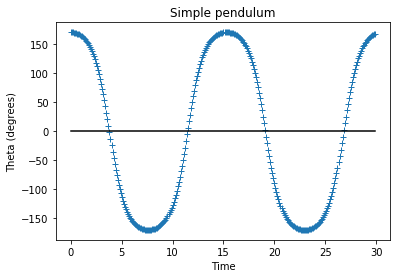

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt

#theta = input("Enter angle in degrees theta = ")  #in degrees
theta = 170
theta = theta*math.pi/180                       #convert degrees to radians
omega = 0                                       #initial velocity
#tau = input("Enter timestep, tau")              #in seconds [s]
tau = 0.1
g_over_L = 1                                    #The constant g/L []
time_old = -1                                   #Fake value (see below)
irev = 0                                        #Used to count number of reversals
nstep = 300                                     #number of time steps
time = 0

#Main Loop
t_plot = np.zeros(nstep)
theta_plot = np.zeros(nstep)
period = np.zeros(nstep)
theta_old = theta - omega*tau                   #Take one backward Euler step in order to start
for n in np.array(range(nstep)):
    t_plot[n] = time                            #Record time and angle
    theta_plot[n] = theta*180/math.pi           #theta for plotting
    a = -g_over_L*math.sin(theta)               #Gravitational acceleration
    theta_new = 2*theta - theta_old +tau**2*a   #Verlet method
    theta_old = theta
    theta = theta_new
    time = time + tau
    if theta*theta_old < 0:                    #Test position for sign change
        print('Turning point at time t =', round(time,5))
        if time_old < 0:                       #If this is just the first change
            time_old = time                    #just record the time
        else:
            irev = irev + 1                    #Increment the number of reversals
            period[irev] = 2*(time - time_old)
            time_old = time
print('Average period =', round(np.mean(period),5),'+/-', round(np.std(period)/math.sqrt(irev),5))
#Graph the oscillations
plt.plot(t_plot,theta_plot, '+')
plt.title('Simple pendulum')
plt.xlabel('Time')
plt.ylabel('Theta (degrees)')
plt.plot([0, t_plot[n]], [0, 0], 'k-')



# Exercise 2.8